<H1> LoopInductance </H1> 
Calculate the inductance of loop. 
<hr>
<H2>Modification history </H2><br> 
<table>
    <tr>
        <th> Modified </th>
        <th> By </th>
        <th> Reason </th>
    </tr>
    <tr> 
        <td> 06-Aug-25 </td>
        <td> CBL </td> 
        <td> Original </td>
    </tr>
</table>
<hr> 
<H2> References </H2> 
<a href="https://www.allaboutcircuits.com/tools/rectangle-loop-inductance-calculator/#:~:text=Output,also%20found%20inside%20metal%20detectors."> Inductance Calc </a> <br> 
<a href="https://gusbertianalog.com/loop-antenna-design/"> Antenna design </a> <br>
<a href="https://www.everythingrf.com/rf-calculators/coaxial-cable-calculator"> Coaxial Cable characteristics </a> <br> 
<a href="https://k7mem.com/Cap_Cylindrical_Caps.html"> coax </a>

<H2> Notes </H2>

<br> 

In [5]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as const
import scipy  as sp

In [6]:
def Rectangle(Width, Height, WD):
    """
    @param Width  - width of loop in m
    @param Height - heigh of loop in m
    @param WD     - Wire diameter in m
    @return - inductance in Henries
    """
    mu = 1  # relative permittivity
    A = np.sqrt(np.power(Width,2)+np.power(Height,2))
    R  = WD/2
    Term1 = -2*(Width+Height)
    Term2 = 2*A
    Term3 = Height * np.log((Height + A)/Width)
    Term4 = Width  * np.log((Width+A)/Height)
    Term5 = Height * np.log(2*Height/R)
    Term6 = Width * np.log(2*Width/R)
    L = const.mu_0/const.pi * ( Term1 + Term2 -  Term3 - Term4 + Term5 + Term6)

    return L

In [7]:
def SquareLoop(N,W,D):
    """
    @param N - number of turns
    @param W - Width in meters
    @param D - wire diameter in meters
    https://emclab.mst.edu/resources/tools/inductance-calculator/square-loop/
    Approximation
    """
    mu = 1  # relative permittivity
    R = D/2
    L = np.power(N,2) * 2 * const.mu_0 * mu * W/np.pi * (np.log(W/R) - 0.774)
    return L

In [8]:
def WirePairC(r1, r2, s, L):
    """
    @param r1 radius wire 1 in m
    @param r2 radius wire 2 in m
    @param s - separation in m
    @param L - length in m

    https://www.emisoftware.com/calculator/wire-pair-capacitance/
    """
    er = 1.0 # relative permittivity
    num = 2.0 * const.pi * L * const.epsilon_0 * er
    den = np.arccosh((np.power(s,2)-np.power(r1,2)-np.power(r2,2))/(2.0*r1*r2))
    return num/den

In [9]:
def LParallelWires(S,D, L):
    """
    @param S - separation of wires in m
    @param D - diameter of wires in m
    @param L - length of wire in m
    """
    mu  = 1
    L = const.mu_0 * mu * L/const.pi * np.arccosh(S/D)
    return L

In [10]:
# Test Case
# 10 by 10 mm square with 1.02mm wire diameter
#
W = 0.1
H = 0.1
WD = 0.001
print('Inductance: ', Rectangle(W, H, WD), ' ', SquareLoop(1, W, WD))

Inductance:  3.619443617491342e-07   3.619453892760543e-07


In [11]:
online = 306.5e-9
L = SquareLoop(1, W, WD)
print('ratio: ', online/L)

ratio:  0.8468128316623855


In [12]:
# Test case cap
R = 0.0005 # wire diameter, AWG18, in m
S = 0.01    # separation in m
L = 1.0
print('Capacitance: ', WirePairC(R,R,S,L))
# Checks out!!

Capacitance:  9.293077340046418e-12


In [72]:
# Attic dimensions 
NS = 35.0*12.0 + 10.0 # North-South dimension in inches
EW = 29.0*12.0 + 2.5  # East-West dimension in inches
W = EW * 0.0254 # convert to m
H = NS * 0.0254 
L = Rectangle(W,H,WD)
# do a simple capacitance calculation ignore adjacent sides
C = WirePairC(R,R,W,H) + WirePairC(R,R,H,W)
Z = np.sqrt(L/C)
print('Dimensions: ', W, ' ', H)
print ('Attic inductance: ', L, ' Cap: ' , C, ' Impedence: ', Z )

Dimensions:  8.9027   10.921999999999999
Attic inductance:  7.225017758806888e-05  Cap:  5.582588239821364e-11  Impedence:  1137.6316375023894


In [71]:
C2 = WirePairC(R,R,W,H) 
C3 = WirePairC(R,R,H,W)
print(NS, ' ', EW)
print(C2, ' ', C3, ' Sum: ' , C2+C3)

430.0   350.5
3.10412913494021e-11   2.4784591048811548e-11  Sum:  5.582588239821364e-11


In [69]:
X = 11.0
Y = 8.0
C2 = WirePairC(R,R,X,Y) 
C3 = WirePairC(R,R,Y,X)
print(C2, ' ', C3, ' Sum: ' , C2+C3)

2.225567685668795e-11   3.160825333690171e-11  Sum:  5.3863930193589656e-11


In [73]:
# Resonance
F0 = 1.0/(2.0*np.pi*np.sqrt(L*C))
print('Resonant at: ', F0, ' Hz')

Resonant at:  2506010.428909064  Hz


Text(0, 0.5, 'Frequency, (Hz)')

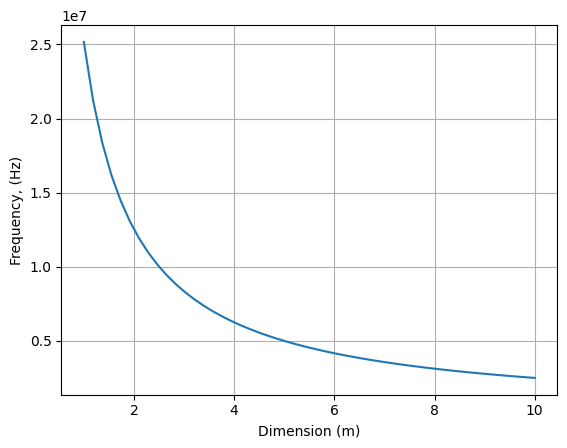

In [13]:
# Lets look at a square loop and see what makes resonance
W = np.linspace(1.0, 10.0)
L = Rectangle(W,W,WD)
# do a simple capacitance calculation ignore adjacent sides
C = 2*WirePairC(R,R,W,W) 
Z = np.sqrt(L/C)
F = 1.0/(2.0*np.pi*np.sqrt(L*C))
plt.plot(W, F)
plt.grid()
plt.xlabel('Dimension (m)')
plt.ylabel('Frequency, (Hz)')

Text(0, 0.5, 'Impedance, (ohms)')

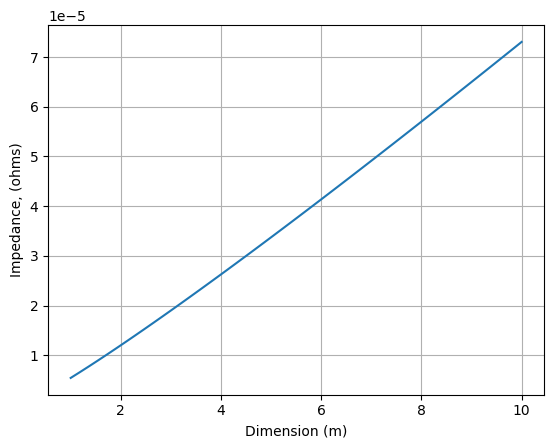

In [14]:
plt.plot(W, L)
plt.grid()
plt.xlabel('Dimension (m)')
plt.ylabel('Impedance, (ohms)')

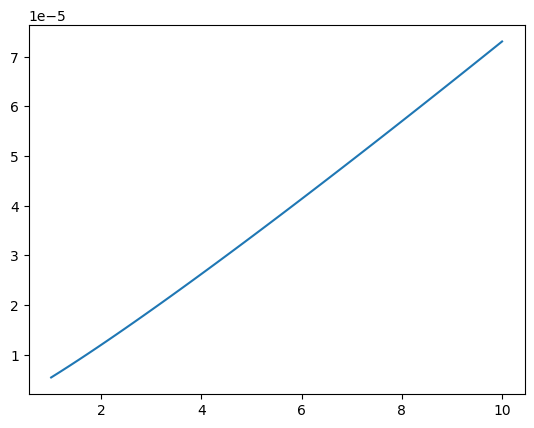

In [82]:
#plt.plot(W,C)
plt.plot(W,L)

Text(0, 0.5, 'Frequency, (Hz)')

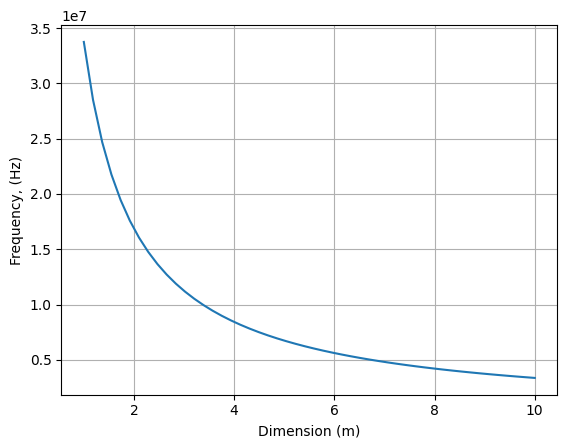

In [84]:
# 
# two wire case
#
# Lets look at a square loop and see what makes resonance
W = np.linspace(1.0, 10.0)
Sep = 0.01 # wire sep in m
WD = 0.001 # wire diameter in m
L = LParallelWires(Sep, WD, W)
# do a simple capacitance calculation ignore adjacent sides
C = 2*WirePairC(R,R,Sep,W) 
Z = np.sqrt(L/C)
F = 1.0/(2.0*np.pi*np.sqrt(L*C))
plt.plot(W, F)
plt.grid()
plt.xlabel('Dimension (m)')
plt.ylabel('Frequency, (Hz)')

Text(0, 0.5, 'Impedance, (ohms)')

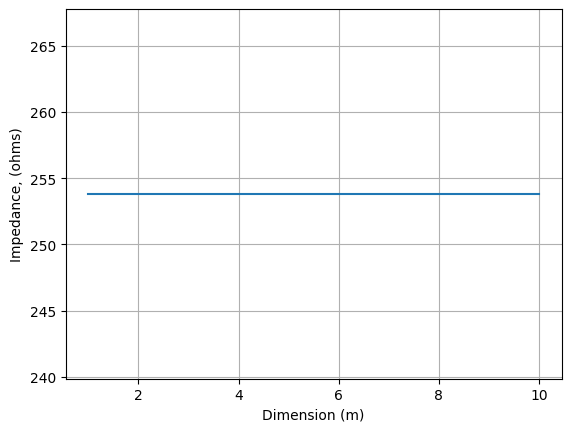

In [85]:
plt.plot(W, Z)
plt.grid()
plt.xlabel('Dimension (m)')
plt.ylabel('Impedance, (ohms)')

In [20]:
L=70e-6
Z = 50.0
print('Needed C: ', L/np.power(Z,2.0) )

Needed C:  2.7999999999999996e-08
